## All of Statistics

This is a notebook of worked problems form **All of Statistics**, by Larry Wasserman.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

### Chapter 1: Probability

#### Exercises

21. Suppose a coin has a probability $p$ of falling hears up...

In [2]:
def get_prop(p, n):
    return stats.bernoulli(p).rvs(n).mean()

In [3]:
def get_props(npts, p):
    ns = np.arange(1, npts+1)
    props = np.zeros(npts)
    for i in range(npts):
        props[i] = get_prop(p, ns[i])
    return ns, props

(0.0, 1.0)

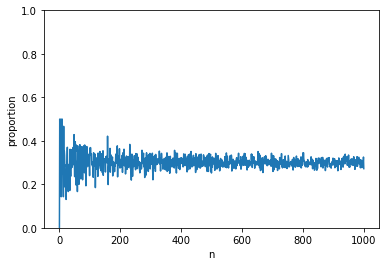

In [4]:
npts = 1000
ns, props = get_props(npts, 0.3)

fig, ax = plt.subplots()
ax.plot(ns, props)
ax.set_xlabel("n")
ax.set_ylabel('proportion')
ax.set_ylim(0, 1)

Text(0, 0.5, 'proportion')

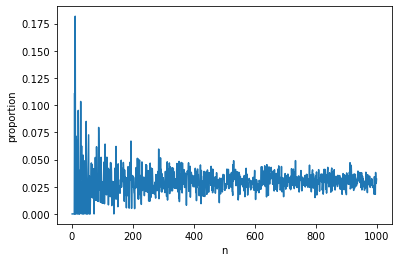

In [5]:
ns, props = get_props(npts, 0.03)

fig, ax = plt.subplots()
ax.plot(ns, props)
ax.set_xlabel("n")
ax.set_ylabel('proportion')

## Chapter 3: Random Variables

### Exercises

1. Show that

$$\mathbb{P}(X=x) = F(x^+) - F(x^-)$$

##### Solution

From Lemma 2.15.1, $\mathbb{P}(X = x) = F(x) - F(x^-)$

From Theorem 2.9.iii, $F(x) = F(x^+)$ for all $x$.

So $\mathbb{P}(X=x) = F(x^+) - F(x^-)$


2. Let $X$ be such that $\mathbb{P}(X=2) = \mathbb{P}(X=3) = 1/10$ and $\mathbb{P}(X=5) = 8/10$. Plot the CDF. Use $F$ to find $\mathbb{P}(2 < X < 4.8)$ and $\mathbb{P}(2 \le X \le 4.8)$

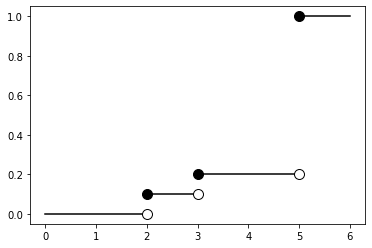

In [6]:
fig, ax = plt.subplots()

ax.plot([0, 2],
        [0, 0], 'k')
ax.plot([2, 3],
        [.1, .1], 'k')
ax.plot([3, 5],
        [.2, .2], 'k')
ax.plot([5, 6],
        [1, 1], 'k');
ax.scatter([2, 3, 5],
        [0, .1, .2],
        s=100,
        facecolor='w',
        edgecolor='k',
        zorder=3)
ax.scatter([2, 3, 5],
        [.1, .2, 1.0],
        s=100,
        facecolor='k',
        edgecolor='k',
        zorder=3)

Let's clean that up a little.

In [7]:
def draw_discrete_cdf(ax, pmf, margin=1/5, color='k'):
    """
    Draw CDF of discrete random variable.
    """
    keys = sorted(pmf)
    diff = keys[-1] - keys[0]
    keys.insert(0, keys[0] - diff * margin)
    keys.append(keys[-1] + diff * margin)
    
    cumm_prob = 0
    for i in range(len(keys)-1):
        if i > 0:
            ax.scatter([keys[i]],
                       [cumm_prob],
                       s=100,
                       facecolor='w',
                       edgecolor='k',
                       zorder=3)
            cumm_prob += pmf[keys[i]]
            ax.scatter([keys[i]],
                       [cumm_prob],
                       s=100,
                       facecolor='k',
                       edgecolor='k',
                       zorder=3)
        ax.plot([keys[i], keys[i+1]],
                [cumm_prob, cumm_prob], 'k')
        ax.set_ylabel('CDF')


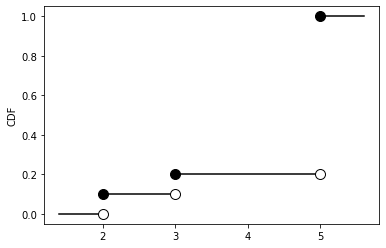

In [8]:
fig, ax = plt.subplots()
draw_discrete_cdf(ax, {2: .1,
                       3: .1,
                       5: .8})

For the probabilities, looking at $F(2^+)$ and $F(2^-)$:

$\mathbb{P}(2 < X < 4.8) = 0.1$ 

$\mathbb{P}(2 \le X \le 4.8) = 0.2$